In [ ]:
#!pip install -r requirements.txt

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import kagglehub
import torch

# Download latest version
path = kagglehub.dataset_download("arashnic/book-recommendation-dataset")
# path = '../dataset'

books = pd.read_csv(f"{path}/Books.csv")
ratings = pd.read_csv(f"{path}/Ratings.csv")
users= pd.read_csv(f"{path}/Users.csv")

book_of_interest = 'the lord of the rings'

100%|██████████| 24.3M/24.3M [00:00<00:00, 151MB/s]

Extracting files...



/tmp/ipython-input-2-3960183323.py:11: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv(f"{path}/Books.csv")


Find LOTR books in the database

In [29]:
books['Book-Title'] = books['Book-Title'].str.lower()
lotr_books = books[books["Book-Title"].str.contains(book_of_interest)]
lotr_books.head(30)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
780,0345339711,"the two towers (the lord of the rings, part 2)",J.R.R. TOLKIEN,1986.0,Del Rey
1571,0345339703,the fellowship of the ring (the lord of the ri...,J.R.R. TOLKIEN,1986.0,Del Rey
3354,0345339681,the hobbit : the enchanting prelude to the lor...,J.R.R. TOLKIEN,1986.0,Del Rey
4206,0345339738,"the return of the king (the lord of the rings,...",J.R.R. TOLKIEN,1986.0,Del Rey
6060,0618129022,the lord of the rings (movie art cover),J.R.R. Tolkien,2001.0,Houghton Mifflin Company
6866,0345340426,the hobbit and the lord of the rings,J.R.R. TOLKIEN,1986.0,Del Rey
11083,0618129014,the lord of the rings (movie art cover),J. R. R. Tolkien,2001.0,Houghton Mifflin Company
12761,0618002243,"the return of the king (the lord of the rings,...",J. R. R. Tolkien,1999.0,Houghton Mifflin Company
12762,0618002235,"the two towers (the lord of the rings, part 2)",J. R. R. Tolkien,1999.0,Houghton Mifflin Company
12763,0618002227,the fellowship of the ring (the lord of the ri...,J. R. R. Tolkien,1999.0,Houghton Mifflin Company


Books

In [ ]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,classical mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,clara callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,decision in normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,flu: the story of the great influenza pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,the mummies of urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


Get rid of images and nan values

In [4]:
books.drop(['Image-URL-S', 'Image-URL-M', 'Image-URL-L'], axis=1, inplace=True)
print(books.isna().any(axis=1).sum()) # there only 4 incomplete rows, I'll simply drop them
books.dropna(inplace=True)

4


I might deduplicate on (author + title) pairs later on, as there may be ratings for same books with different ISBNs that I would otherwise get rid off

In [5]:
num_duplicates = books.duplicated(subset=['Book-Title', 'Book-Author']).sum()
print(f"Duplicate books ({round(num_duplicates*100/len(books), 2)} %)")

Duplicate books (8.17 %)


In [6]:
books['Year-Of-Publication'] = pd.to_numeric(books['Year-Of-Publication'], errors='coerce')
books = books.fillna({'Year-Of-Publication': 1993}) # 1993 is the mean
books['Year-Of-Publication'][books['Year-Of-Publication'] > 0].describe()

,Year-Of-Publication
count,266738.000000
mean,1993.689681
std,8.325792
min,1376.000000
25%,1989.000000
50%,1996.000000
75%,2000.000000
max,2050.000000


Text(0.5, 1.0, 'Top Authors')

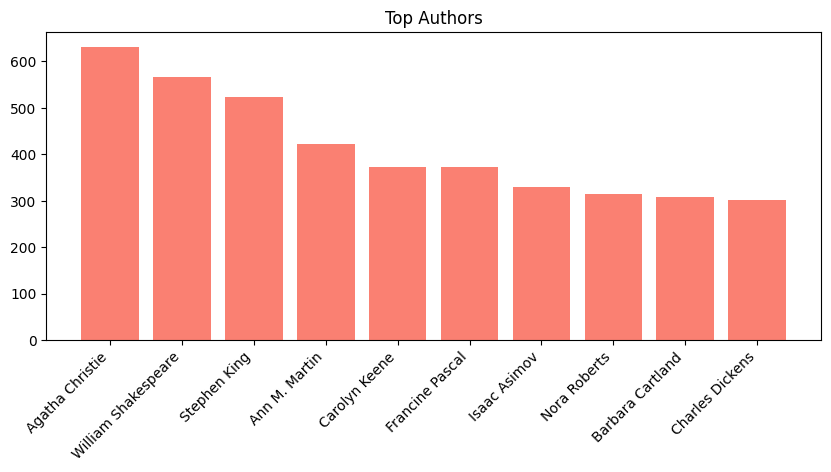

In [ ]:
author_count = books['Book-Author'].value_counts().reset_index(name='Count').sort_values('Count', ascending=False).head(10)

fig, ax = plt.subplots(1, 1, figsize=(10, 4))
ax.bar(author_count['Book-Author'], author_count['Count'], color='salmon')
ax.set_xticks(range(len(author_count)))
ax.set_xticklabels(author_count['Book-Author'], rotation=45, ha='right')
ax.set_title('Top Authors')

Users

In [7]:
users['Location'] = users['Location'].apply(lambda x: x.split(',')[-1].lower())
users['Location'].unique()[:10]

array([' usa', ' russia', ' portugal', ' united kingdom', ' canada',
       ' spain', ' australia', ' brazil', '', ' germany'], dtype=object)

In [ ]:
users.isna().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [8]:
users['Age'].isna().sum() / len(users['Age'])

np.float64(0.3971985741847105)

In [9]:
users.fillna({'Age': 0}, inplace=True)

In [10]:
users.loc[users['Age'] <= 3, 'Age'] = 0
users[users['Age'] > 3].describe()

,User-ID,Age
count,167242.000000,167242.000000
mean,139394.795972,34.925103
std,80554.752563,14.258066
min,2.000000,4.000000
25%,69913.250000,24.000000
50%,139361.500000,32.000000
75%,209153.750000,44.000000
max,278855.000000,244.000000


In [11]:
mean = users['Age'][users['Age'] <= 3].mean()
users['Age'] = users['Age'].replace(0, mean)

Ratings

In [12]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


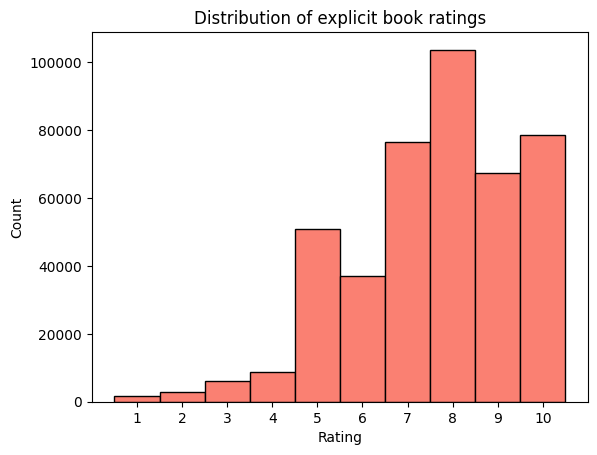

In [ ]:
plt.hist(ratings['Book-Rating'], color='salmon', bins=range(1, 12), edgecolor='black', align='left')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of explicit book ratings')
plt.xticks(range(1, 11))
plt.show()

We have explicit and implicit feedback...

In [13]:
ratings_explicit = ratings[ratings['Book-Rating'] != 0] # choose only explicit ratings for now

book_ratings = pd.merge(books, ratings_explicit, on='ISBN')
implicit = 1 - len(book_ratings) / len(ratings)
print(f"Implicit ratings percentage: {implicit:.2%}")

Implicit ratings percentage: 66.62%


Get the user-book rating matrix

In [14]:
complete_df = book_ratings.merge(users, on="User-ID") # create a triplet dataframe of users;rankings;books dataframes
complete_df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,User-ID,Book-Rating,Location,Age
0,0002005018,clara callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,8,5,canada,0.0
1,0002005018,clara callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,11676,8,n/a,0.0
2,0002005018,clara callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,67544,8,canada,30.0
3,0002005018,clara callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,116866,9,,0.0
4,0002005018,clara callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,123629,9,canada,0.0


Calculate the sparsity of our user-book ratings

In [15]:
def compute_sparsity(ratings_df):
    n_users = ratings_df['User-ID'].nunique()
    n_books = ratings_df['ISBN'].nunique()
    print(f"Number of users: {n_users}")
    print(f"Number of books: {n_books}")

    total_possible = n_users * n_books
    actual_ratings = len(ratings_df)
    print(f"Actual ratings: {actual_ratings}")
    print(f"Total possible ratings: {total_possible}")

    sparsity = 1 - (actual_ratings / total_possible)
    print(f"Sparsity of the user-book ratings: {sparsity:.7f}")

    return sparsity

In [16]:
sparsity = compute_sparsity(complete_df)

Number of users: 68091
Number of books: 149832
Actual ratings: 383838
Total possible ratings: 10202210712
Sparsity of the user-book ratings: 0.9999624


Our data is very sparse. To try and mitgate this, we can filter out less popular books and inexperienced users

In [17]:
mask_users = complete_df.groupby('User-ID')['Book-Rating'] \
                        .transform('size') >= 1
mask_books = complete_df.groupby('ISBN')['Book-Rating'] \
                         .transform('size') >= 10

filtered_df = complete_df[mask_users & mask_books]

In [18]:
sparsity = compute_sparsity(filtered_df)

Number of users: 39365
Number of books: 5444
Actual ratings: 139296
Total possible ratings: 214303060
Sparsity of the user-book ratings: 0.9993500


I will train a classical SVD model and use the learned book vectors in latent space to do item to item similarity.

If a root mean square error is around 1.5 on average. We can safely say that the average rating prediction of our model is off by no more than 1.5, since rmse is greater or equal to the mean absolute error

In [ ]:
from surprise import SVD, Dataset, Reader
from surprise.model_selection import KFold
from surprise import accuracy

data_df = filtered_df[['User-ID', 'ISBN', 'Book-Rating']].copy()

# create the model from surprise library and perform 5-fold cross-validation
min_c, max_c = data_df['Book-Rating'].min(), data_df['Book-Rating'].max()
reader = Reader(rating_scale=(min_c, max_c))
data = Dataset.load_from_df(data_df, reader)
model = SVD(n_factors=50)

rmse_test, rmse_train = [], []
kf = KFold(n_splits=5, random_state=42, shuffle=True)

for fold, (train, test) in enumerate(kf.split(data)):
    model.fit(train)

    preds = model.test(test)
    rmse_curr = accuracy.rmse(preds)
    rmse_test.append(rmse_curr)

    train_testset = train.build_testset()
    preds = model.test(train_testset)
    rmse_curr = accuracy.rmse(preds, verbose=False)
    rmse_train.append(rmse_curr)

print(f"Mean test set RMSE: {np.mean(rmse_test):.4f}")
print(f"Mean train set RMSE: {np.mean(rmse_train):.4f}")

RMSE: 1.5324
RMSE: 1.5395
RMSE: 1.5685
RMSE: 1.5382
RMSE: 1.5469
Mean test set RMSE: 1.5451
Mean train set RMSE: 1.1488


In [ ]:
import numpy as np

isbn2title = {
    isbn: title.strip().lower()
    for isbn, title in zip(books['ISBN'], books['Book-Title'])
}

inner2title = {}
for inner_id in range(train.n_items):
    try:
        raw_id = train.to_raw_iid(inner_id)
        inner2title[inner_id] = isbn2title.get(raw_id, "").lower()
    except ValueError:
        continue

title2inner = {
    title: iid
    for iid, title in inner2title.items()
    if title
}

def book2book_retrieval(book_title, model, title2inner, inner2title, top_n=10):
    key = book_title.lower()
    if key not in title2inner:
        # find a partial match
        for inner_id, title in inner2title.items():
            if book_title.lower() in title:
                key = title
                break
        else:
            print(f"No match found for '{book_title}'")
            return []
        print(f"No exact match for '{book_title}' found. Showing results for '{key}' instead.")

    inner_id = title2inner[key]

    # cosine sim
    q = model.qi[inner_id]
    q_norm = q / np.linalg.norm(q)
    db_norm = model.qi / np.linalg.norm(model.qi, axis=1, keepdims=True)
    sims = db_norm.dot(q_norm)

    recs = [
        (inner2title[iid], round(score, 3))
        for iid, score in enumerate(sims)
        if iid != inner_id
    ]
    recs.sort(key=lambda x: x[1], reverse=True)
    return recs[:top_n]

In [ ]:
book_of_interest = 'the lord of the rings'
print(title2inner[book_of_interest])

1000


In [ ]:
book2book_retrieval(book_of_interest, model, title2inner, inner2title, top_n=10)

[('the walking', 0.505),
 ('forbidden fruit', 0.444),
 ('deja dead', 0.435),
 ("the sweet potato queens' big-ass cookbook (and financial planner)", 0.427),
 ('in the heart of the sea: the tragedy of the whaleship essex', 0.426),
 ('a cold heart: an alex delaware novel', 0.401),
 ("l'etranger (collection folio, 2)", 0.399),
 ('the family', 0.399),
 ('the cabinet of curiosities', 0.396),
 ('dark rivers of the heart: a novel', 0.394)]

In [46]:
# data = Loader(filtered_df, config['year_intervals'], config['age_intervals'])
X_df = pd.pivot(data=filtered_df, columns='ISBN', index='User-ID', values='Book-Rating')

In [47]:
X_df.fillna(0)
X = torch.tensor(X_df.fillna(0).values, dtype=torch.float32)

In [48]:
print(X.shape)

torch.Size([39365, 5444])


In [49]:
I = torch.eye(X.shape[1])
reg = 1e-2 # should be 10 - 100
P_hat = torch.inverse(X.T @ X + reg * I)

In [89]:
B_hat = I - P_hat * torch.diag(I / torch.diag(P_hat))
B_hat = B_hat.fill_diagonal_(0)
print(B_hat.shape)

torch.Size([5444, 5444])


In [90]:
import pickle

with open("model10.pkl", "wb") as f:
    pickle.dump(B_hat, f)

In [85]:
filtered_df['Book-Title'] = filtered_df['Book-Title'].str.lower()
lotr_books = filtered_df[filtered_df["Book-Title"] == 'the lord of the rings']
lotr_books

/tmp/ipython-input-85-2050605596.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Book-Title'] = filtered_df['Book-Title'].str.lower()


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,User-ID,Book-Rating,Location,Age
197355,0618260250,the lord of the rings,J. R. R. Tolkien,2002.0,Houghton Mifflin Company,20172,10,usa,27.0
197356,0618260250,the lord of the rings,J. R. R. Tolkien,2002.0,Houghton Mifflin Company,82487,5,usa,33.0
197357,0618260250,the lord of the rings,J. R. R. Tolkien,2002.0,Houghton Mifflin Company,94485,10,usa,21.0
197358,0618260250,the lord of the rings,J. R. R. Tolkien,2002.0,Houghton Mifflin Company,135149,10,usa,0.0
197359,0618260250,the lord of the rings,J. R. R. Tolkien,2002.0,Houghton Mifflin Company,142121,10,usa,33.0
197360,0618260250,the lord of the rings,J. R. R. Tolkien,2002.0,Houghton Mifflin Company,145449,10,usa,0.0
197361,0618260250,the lord of the rings,J. R. R. Tolkien,2002.0,Houghton Mifflin Company,176808,6,usa,0.0
197362,0618260250,the lord of the rings,J. R. R. Tolkien,2002.0,Houghton Mifflin Company,220623,9,usa,0.0
197363,0618260250,the lord of the rings,J. R. R. Tolkien,2002.0,Houghton Mifflin Company,223953,10,usa,29.0
197364,0618260250,the lord of the rings,J. R. R. Tolkien,2002.0,Houghton Mifflin Company,225887,10,usa,13.0


In [91]:
isbn = '0618260250'
column_index = X_df.columns.get_loc(isbn)

print("Column index:", column_index)

Column index: 3858


In [97]:
sim = B_hat @ B_hat[3858] # dot product, not cosine similarity

In [110]:
sim[3858] = float('-inf') # mask out the same index
top_index = sim.argmax().item()
sim.max()

tensor(0.1687)

In [105]:
top_isbn = X_df.columns[top_index]
print("Most similar ISBN:", top_isbn)

Most similar ISBN: 006447108X


In [111]:
filtered_df[filtered_df.ISBN == '006447108X'].describe()

,Year-Of-Publication,User-ID,Book-Rating,Age
count,18.0,18.000000,18.000000,18.000000
mean,1994.0,126520.222222,8.833333,32.611111
std,0.0,76023.516013,1.465285,17.365073
min,1994.0,11993.000000,5.000000,0.000000
25%,1994.0,78343.500000,9.000000,23.500000
50%,1994.0,102183.000000,9.000000,33.000000
75%,1994.0,190028.250000,10.000000,41.500000
max,1994.0,272573.000000,10.000000,63.000000


In [ ]:
# import pickle
#
# with open("models/svd_model/model2.pkl", "wb") as f:
#     pickle.dump(model, f)
#
# with open("models/svd_model/inner2title2.pkl", "wb") as f:
#     pickle.dump(inner2title, f)

Since the feedback is so sparse, I'll try a NN based approach incorporate book and user metadata. For that, I need to do some more data preprocessing

In [ ]:
# split_idx = int(0.8 * len(filtered_df))
# train_df = filtered_df[:split_idx]
# test_df = filtered_df[split_idx:]

# train = torch.utils.data.DataLoader(Loader(train_df, config['year_intervals'], config['age_intervals']),
#                                     batch_size=config['batch_size'], shuffle=True)
# test = torch.utils.data.DataLoader(Loader(test_df, config['year_intervals'], config['age_intervals']),
#                                     batch_size=config['batch_size'], shuffle=False)

# nn_model = Recommender(
#     filtered_df['User-ID'].nunique(),
#     filtered_df['ISBN'].nunique(),
#     filtered_df['Location'].nunique() * len(config['age_intervals']),
#     filtered_df['Book-Author'].nunique() * len(config['year_intervals']))

# optimizer = torch.optim.AdamW(nn_model.parameters(), lr=1e-3, weight_decay=1e-3)

In [ ]:
# for i in range(config['epochs']):
#     nn_model.train()
#     train_losses = []
#     for (x, y) in train:
#         optimizer.zero_grad()
#         y_pred = nn_model(x)
#         metric = torch.sqrt(torch.nn.functional.mse_loss(y_pred.sigmoid() * 10, y))
#         loss = torch.nn.functional.binary_cross_entropy_with_logits(y_pred, y / 10)
#         train_losses.append(metric.item())
#         loss.backward()
#         optimizer.step()

#     nn_model.eval()
#     test_losses = []
#     with torch.no_grad():
#         for (x, y) in test:
#             y_pred = nn_model(x).squeeze(-1)
#             loss = torch.sqrt(torch.nn.functional.mse_loss(y_pred.sigmoid() * 10, y))
#             test_losses.append(loss.item())

#     train_rmse = np.mean(train_losses)
#     test_rmse = np.mean(test_losses)
#     print(f"Epoch {i+1}/{config['epochs']} - Train RMSE: {train_rmse:.4f}, Test RMSE: {test_rmse:.4f}")

In [ ]:
# def book2book_retrieval(book_title, train, model, book2idx, idx2book, top_n=10):
#     key = book_title.lower()
#     if key not in title2inner:
#         # find a partial match
#         for inner_id, title in inner2title.items():
#             if book_title.lower() in title:
#                 key = title
#                 break
#         else:
#             print(f"No match found for '{book_title}'")
#             return []
#         print(f"No exact match for '{book_title}' found. Showing results for '{key}' instead.")

#     inner_id = title2inner[key] # the inner key in this case is actually the ISBN

#     # cosine sim
#     author = train.ratings.loc[train.ratings['ISBN'] == inner_id, 'Book-Author'].iloc[0]
#     year_bin = train.ratings.loc[train.ratings['ISBN'] == inner_id, 'Year-Of-Publication'].iloc[0]
#     sims = model.item_embeddings()

#     recs = [
#         (inner2title[iid], round(score, 3))
#         for iid, score in enumerate(sims)
#         if iid != inner_id
#     ]
#     recs.sort(key=lambda x: x[1], reverse=True)
#     return recs[:top_n]

In [ ]:
# book2book_retrieval()